# Collaborative Filtering

In [1]:
import pandas as pd

cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
df = pd.read_csv("file\\ml-1m\\ratings.dat", sep="::", header=None, names=cols)
df.head()

<ipython-input-1-d38f2d7b5169>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("file\\ml-1m\\ratings.dat", sep="::", header=None, names=cols)


,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
df = df.drop('unix_timestamp', 1)
df.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [3]:
input_df = pd.DataFrame(index=range(1,max(df['user_id'])+1), columns=range(1,max(df['movie_id'])+1))

In [4]:
for index,row in df.iterrows():
    input_df[row['movie_id']][row['user_id']]=row['rating']

In [5]:
print(input_df.shape)
input_df

(6040, 3952)


,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이용자 64명만 자르기(시간 단축)

In [6]:
input_df = input_df.truncate(after=64, axis=1)
for column in input_df:
    if input_df[column].count() < 2:
        print(column)

51


In [7]:
input_df.shape

(6040, 64)

In [8]:
input_df = input_df.dropna(axis=0, how='all')

In [9]:
for column in input_df:
    if input_df[column].count() < 2:
        print(column)

51


In [10]:
input_df.shape

(4811, 64)

Similarity matrix

In [11]:
import numpy as np
import math

In [12]:
mean_col = input_df.mean(axis=1)

In [13]:
def user_similarity(a,b):
    if (not a in input_df.index or not b in input_df.index):
        return np.nan
    cov = 0.0
    var_a = 0.0
    var_b = 0.0
    for column in input_df:
        avg_rating_a = mean_col[a]
        avg_rating_b = mean_col[b]
        j_rating_a = input_df[column][a]
        j_rating_b = input_df[column][b]
        
        if (not np.isnan(j_rating_a) and not np.isnan(j_rating_b)):
            cov = cov + (j_rating_a - avg_rating_a) * (j_rating_b - avg_rating_b)
            var_a = var_a + (j_rating_a - avg_rating_a) * (j_rating_a - avg_rating_a)
            var_b = var_b + (j_rating_b - avg_rating_b) * (j_rating_b - avg_rating_b)
        if (var_a == 0 or var_b == 0):
            return 0
        return (cov/(math.sqrt(var_a*var_b)))

In [14]:
sim = np.zeros(shape=(max(df['user_id']), max(df['user_id'])))
num_of_users = max(df['user_id'])
it = 0

for i in range(num_of_users):
    for j in range(i+1):
        sim[i][j] = user_similarity(i+1, j+1)
        sim[j][i] = sim[i][j]

In [15]:
sim

array([[ 0.,  0., nan, ..., nan,  0.,  0.],
       [ 0.,  0., nan, ..., nan,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0., nan, ..., nan,  0.,  0.],
       [ 0.,  0., nan, ..., nan,  0.,  1.]])

In [16]:
def round_off_rating(val):
    new_val = int(val)
    frac = val - int(val)
    if (frac >= 0.75):
        new_val = new_val + 1
    elif (frac >= 0.25):
        new_val = new_val + 0.5
    return max(min(new_val, 5.0), 1)

def predict_column_rating(column_no):
    temp = input_df[input_df[column_no].notnull()][column_no]
    for index, null_rating in input_df[column_no].iteritems():
        num_sum = 0
        den_sum = 0
        if (np.isnan(null_rating)):
            for i,rating in temp.iteritems():
                num_sum = num_sum + sim[index-1][i-1] * (rating - mean_col[i])
                den_sum = den_sum + sim[index-1][i-1]
            if (den_sum == 0):
                input_df[column_no][index] = round_off_rating(mean_col[index])
            else:
                input_df[column_no][index] = round_off_rating(mean_col[index] + num_sum/den_sum)

In [17]:
for column_no in input_df:
    predict_column_rating(column_no)

In [18]:
input_df

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,3.5,3.5,3.5,3.5,3.5,2,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
6,4,4,4,3.5,3.5,4.5,4,3.5,3,4,...,4.5,1,4,4.5,3.5,4,3,4.5,3.5,3
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,4,2.5,1,2,1,3,3,2,1.5,2.5,...,2.5,1,2.5,5,2,2.5,1.5,4,2,1.5
6036,3,3,3,2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,1,3,3
6037,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
6039,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [19]:
input_df.to_csv("filtered_input.csv", index_label=False)

# Dimensionality Reduction using Autoencoders

In [20]:
from keras.layers import Input, Dense
from keras.models import Model

Input layer(64) -> 16 -> 5 -> 16 -> Output layer(64)

In [21]:
encoding_dim1 = 16
encoding_dim2 = 5
input_rating = Input(shape=(64,))
encoded = Dense(16, activation='relu')(input_rating)  # 64->16
encoded = Dense(5, activation='relu')(encoded)        # 16->05
decoded = Dense(16, activation='relu')(encoded)       # 05->16
decoded = Dense(64, activation='sigmoid')(decoded)    # 16->64
autoencoder = Model(input_rating, decoded)

In [22]:
encoder1 = Model(input_rating, autoencoder.layers[1](input_rating))
input_encoding = Input(shape=(encoding_dim1,))
encoder2 = Model(input_encoding, autoencoder.layers[2](input_encoding))
encoded_input1 = Input(shape=(encoding_dim2,))
encoded_input2 = Input(shape=(encoding_dim1,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder1 = Model(encoded_input1, decoder_layer1(encoded_input1))
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))

In [23]:
autoencoder.compile(optimizer='adam', loss='mse')

In [24]:
input_df = input_df/5
input_df

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
5,0.7,0.7,0.7,0.7,0.7,0.4,0.7,0.7,0.7,0.7,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
6,0.8,0.8,0.8,0.7,0.7,0.9,0.8,0.7,0.6,0.8,...,0.9,0.2,0.8,0.9,0.7,0.8,0.6,0.9,0.7,0.6
7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0.8,0.5,0.2,0.4,0.2,0.6,0.6,0.4,0.3,0.5,...,0.5,0.2,0.5,1,0.4,0.5,0.3,0.8,0.4,0.3
6036,0.6,0.6,0.6,0.4,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.2,0.6,0.6
6037,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
6039,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6


In [25]:
x_train = input_df.sample(frac=0.8, random_state=200).astype(float)
x_test = input_df.drop(x_train.index).astype(float)

In [26]:
x_train.shape

(3849, 64)

In [27]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=100, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/100
39/39 [==============================] - 1s 5ms/step - loss: 0.0741 - val_loss: 0.0568
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.0295
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0249 - val_loss: 0.0214
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.0195
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0184
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0174
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0161
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0146
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0132
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 11/

39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 84/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 85/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 86/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 87/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 88/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 89/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 90/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 91/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 92/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 93/100


In [28]:
encoded_output1 = encoder1.predict(input_df.astype(float))
encoded_output2 = encoder2.predict(encoded_output1)
decoded_output1 = decoder1.predict(encoded_output2)
decoded_output2 = decoder2.predict(decoded_output1)

In [29]:
encoded_output2

array([[0.        , 6.637412  , 0.        , 1.1688082 , 2.9008842 ],
       [0.        , 0.6037427 , 0.        , 1.547431  , 0.        ],
       [0.        , 4.3809586 , 0.        , 1.2791642 , 1.324759  ],
       ...,
       [0.        , 4.41396   , 0.        , 1.3000157 , 1.3945901 ],
       [0.        , 3.629502  , 0.        , 1.3532279 , 0.90669715],
       [0.        , 4.3927307 , 0.        , 0.6095389 , 0.80145574]],
      dtype=float32)

In [30]:
decoded_output2

array([[0.97296995, 0.9774649 , 0.9744055 , ..., 0.9771546 , 0.97296536,
        0.97046894],
       [0.19942081, 0.19904464, 0.19753584, ..., 0.2004765 , 0.19702742,
        0.19570693],
       [0.70458925, 0.700958  , 0.6935374 , ..., 0.7088861 , 0.6944445 ,
        0.68749887],
       ...,
       [0.70569265, 0.71154094, 0.70373446, ..., 0.7148041 , 0.71087563,
        0.7061859 ],
       [0.59482807, 0.60309917, 0.6020459 , ..., 0.603162  , 0.6063592 ,
        0.6004469 ],
       [0.8123286 , 0.6469566 , 0.62549675, ..., 0.7276427 , 0.5308068 ,
        0.47522736]], dtype=float32)

In [31]:
ans = decoded_output2 * 5
for (x,y), value in np.ndenumerate(ans):
    ans[x][y] = round_off_rating(ans[x][y])

In [32]:
ans

array([[5. , 5. , 5. , ..., 5. , 5. , 5. ],
       [1. , 1. , 1. , ..., 1. , 1. , 1. ],
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       ...,
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       [3. , 3. , 3. , ..., 3. , 3. , 3. ],
       [4. , 3. , 3. , ..., 3.5, 2.5, 2.5]], dtype=float32)

In [33]:
ans_df = pd.DataFrame(ans)

In [34]:
df = input_df.copy()
df = df * 5

In [35]:
ans_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
3,4.5,4.0,4.0,3.5,3.5,4.5,4.0,3.5,3.0,4.0,...,4.5,1.0,4.0,4.5,3.5,4.0,3.0,4.5,3.5,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,3.5,2.5,2.0,2.0,2.0,2.5,2.5,2.0,1.5,2.5,...,2.5,1.0,2.5,2.5,2.0,2.0,1.5,2.5,2.0,1.5
4807,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4808,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
4809,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [36]:
df

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,3.5,3.5,3.5,3.5,3.5,2,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
6,4,4,4,3.5,3.5,4.5,4,3.5,3,4,...,4.5,1,4,4.5,3.5,4,3,4.5,3.5,3
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,4,2.5,1,2,1,3,3,2,1.5,2.5,...,2.5,1,2.5,5,2,2.5,1.5,4,2,1.5
6036,3,3,3,2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,1,3,3
6037,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
6039,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


Results

In [37]:
import matplotlib.pyplot as plt

Plot user-6 ratings

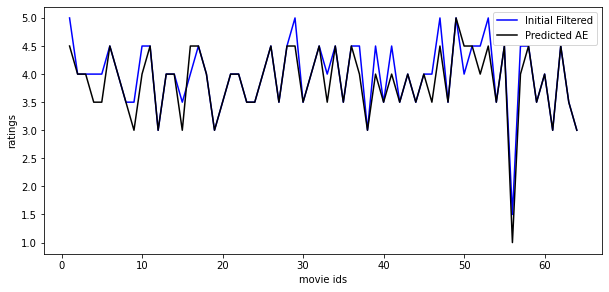

In [55]:
plt.figure(figsize=(10,10))
plt.subplot(211)
line1, = plt.plot(range(1,65), df.iloc[6], 'b')
line2, = plt.plot(range(1,65), ans_df.iloc[3], 'k')
plt.ylabel('ratings')
plt.xlabel('movie ids')
plt.legend([line1, line2], ['Initial Filtered', 'Predicted AE'])

Plot of movie ratings

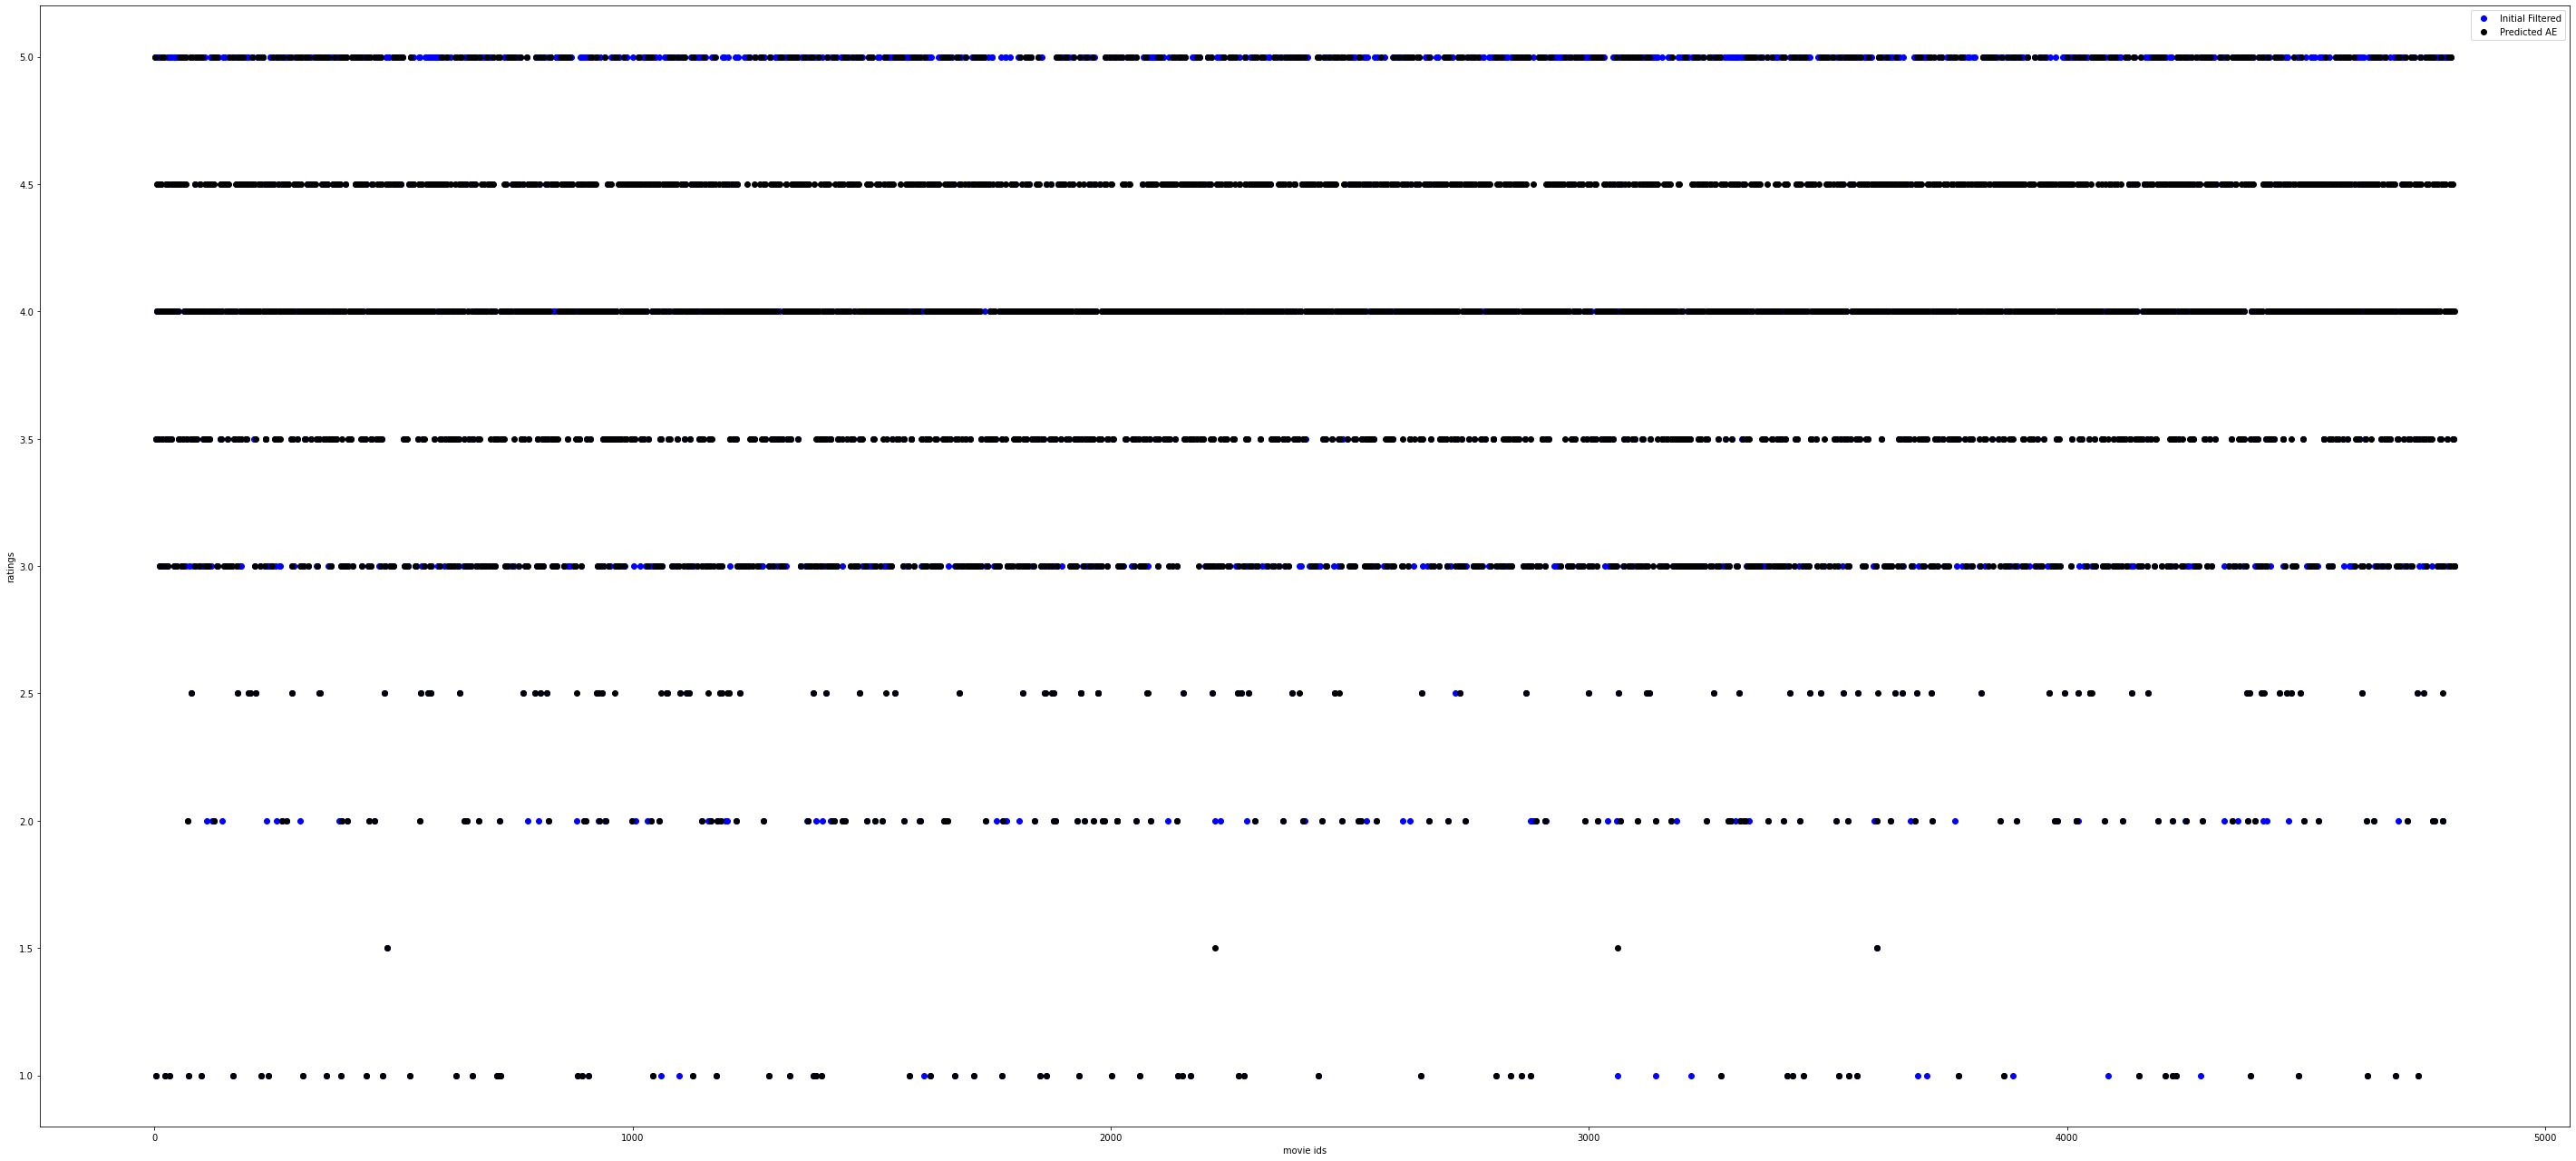

In [67]:
plt.figure(figsize=(50,50))
plt.subplot(212)
line1, = plt.plot(range(1,4812), df[1].tolist(), 'bo')
line2, = plt.plot(range(1,4812), ans_df[0].tolist(), 'ko')
plt.ylabel('ratings')
plt.xlabel('movie ids')
plt.legend([line1, line2], ['Initial Filtered', 'Predicted AE'])